# Project 445
## Mar, 10th

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
#import scipy.stats as ss
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,  accuracy_score, f1_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from pandas.core.frame import DataFrame
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from prettytable import PrettyTable

# Data Cleaning

In [2]:
df = pd.read_csv('loopnet_data_ca.csv')

In [3]:
# Data Cleaning
#drop column "property_subtype" since it has no values
df = df.drop(columns = ['property_subtype'])
#drop column "ain", "zip", "address" since tel numbers don't effect house value
df = df.drop(columns = ['ain','zip','address','id','crawled_id'])
df = df.drop(columns = ['price_per_unit'])
df = df.drop(columns = ['apartment_style'])
df = df.drop(columns = ['property_type'])

In [4]:
df.head()

,price_usd,size_sf,sale_type,no_stories,year_built,year_renovated,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,opportunity_zone
0,3895000.0,8156.0,Investment,2.0,1964.0,NaN,1.72,10.0,0.16,B,4.88,14.35,No
1,2925000.0,7000.0,Investment,2.0,1941.0,2013.0,2.57,7.0,0.28,C,5.13,14.00,No
2,4895000.0,10788.0,Investment,2.0,1957.0,NaN,0.93,11.0,0.22,C,2.75,21.00,No
3,3799000.0,8812.0,Investment,3.0,2021.0,NaN,1.59,7.0,0.19,B,5.31,13.90,Yes
4,2950000.0,7566.0,Investment,2.0,1953.0,NaN,2.11,8.0,0.38,C,3.40,18.74,No


In [5]:
#replace year_built with those house which has year_renovated
df['year_built'][df['year_renovated'].notnull()] = df[df['year_renovated'].notnull()]['year_renovated']
df = df.drop(columns = ['year_renovated'])

In [6]:
#build a factor that indicates the house's age
df = df.rename(columns={'year_built': 'house_age'})
df['house_age'] = 2022 - np.array(df['house_age'])
df.head()

,price_usd,size_sf,sale_type,no_stories,house_age,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,opportunity_zone
0,3895000.0,8156.0,Investment,2.0,58.0,1.72,10.0,0.16,B,4.88,14.35,No
1,2925000.0,7000.0,Investment,2.0,9.0,2.57,7.0,0.28,C,5.13,14.00,No
2,4895000.0,10788.0,Investment,2.0,65.0,0.93,11.0,0.22,C,2.75,21.00,No
3,3799000.0,8812.0,Investment,3.0,1.0,1.59,7.0,0.19,B,5.31,13.90,Yes
4,2950000.0,7566.0,Investment,2.0,69.0,2.11,8.0,0.38,C,3.40,18.74,No


In [7]:
#drop all NaN
df = df.dropna()

In [8]:
df

,price_usd,size_sf,sale_type,no_stories,house_age,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,opportunity_zone
0,3895000.0,8156.0,Investment,2.0,58.0,1.72,10.0,0.16,B,4.88,14.35,No
1,2925000.0,7000.0,Investment,2.0,9.0,2.57,7.0,0.28,C,5.13,14.00,No
2,4895000.0,10788.0,Investment,2.0,65.0,0.93,11.0,0.22,C,2.75,21.00,No
3,3799000.0,8812.0,Investment,3.0,1.0,1.59,7.0,0.19,B,5.31,13.90,Yes
4,2950000.0,7566.0,Investment,2.0,69.0,2.11,8.0,0.38,C,3.40,18.74,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9016,30600000.0,81243.0,Investment,2.0,67.0,1.28,80.0,3.33,C,3.66,16.33,No
9019,3400000.0,3216.0,Investment,2.0,4.0,2.49,6.0,0.12,C,3.79,17.37,No
9021,3875000.0,5881.0,Investment,2.0,7.0,1.53,7.0,0.15,C,3.48,19.50,No
9024,3350000.0,4174.0,Investment,2.0,66.0,3.83,5.0,0.20,C,2.36,24.81,No


In [9]:
#change variable 'building_class' type
df['building_class'][df['building_class'] == 'C'] = 1
df['building_class'][df['building_class'] == 'B'] = 2
df['building_class'][df['building_class'] == 'A'] = 3
df['building_class'][df['building_class'] == 'F'] = 0

In [10]:
#change variable 'sale_type' type
df['sale_type'][df['sale_type'] ==  'Investment or Owner User'] = 3
df['sale_type'][df['sale_type'] == 'Investment'] = 2
df['sale_type'][df['sale_type'] == 'Owner User'] = 1

In [11]:
#change variable 'opportunity_zone' type
df['opportunity_zone'][df['opportunity_zone'] == 'Yes'] = 1
df['opportunity_zone'][df['opportunity_zone'] == 'No'] = 0

In [12]:
df

,price_usd,size_sf,sale_type,no_stories,house_age,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,opportunity_zone
0,3895000.0,8156.0,2,2.0,58.0,1.72,10.0,0.16,2,4.88,14.35,0
1,2925000.0,7000.0,2,2.0,9.0,2.57,7.0,0.28,1,5.13,14.00,0
2,4895000.0,10788.0,2,2.0,65.0,0.93,11.0,0.22,1,2.75,21.00,0
3,3799000.0,8812.0,2,3.0,1.0,1.59,7.0,0.19,2,5.31,13.90,1
4,2950000.0,7566.0,2,2.0,69.0,2.11,8.0,0.38,1,3.40,18.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9016,30600000.0,81243.0,2,2.0,67.0,1.28,80.0,3.33,1,3.66,16.33,0
9019,3400000.0,3216.0,2,2.0,4.0,2.49,6.0,0.12,1,3.79,17.37,0
9021,3875000.0,5881.0,2,2.0,7.0,1.53,7.0,0.15,1,3.48,19.50,0
9024,3350000.0,4174.0,2,2.0,66.0,3.83,5.0,0.20,1,2.36,24.81,0


# Data Description

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 9027
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_usd              695 non-null    float64
 1   size_sf                695 non-null    float64
 2   sale_type              695 non-null    object 
 3   no_stories             695 non-null    float64
 4   house_age              695 non-null    float64
 5   parking_ratio          695 non-null    float64
 6   no_units               695 non-null    float64
 7   lot_size_ac            695 non-null    float64
 8   building_class         695 non-null    object 
 9   cap_rate               695 non-null    float64
 10  gross_rent_multiplier  695 non-null    float64
 11  opportunity_zone       695 non-null    object 
dtypes: float64(9), object(3)
memory usage: 70.6+ KB


Text(0.5, 1.0, 'size_sf')

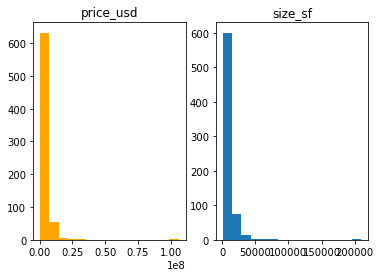

In [14]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['price_usd'], bins=15,color='orange')
axs[0].set_title('price_usd')
axs[1].hist(df['size_sf'], bins=15)
axs[1].set_title('size_sf')

Text(0.5, 1.0, 'no_stories')

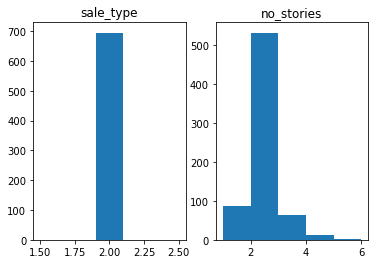

In [15]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['sale_type'], bins=5)
axs[0].set_title('sale_type')
axs[1].hist(df['no_stories'], bins=5)
axs[1].set_title('no_stories')

Text(0.5, 1.0, 'parking_ratio')

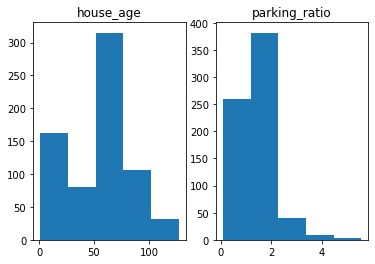

In [16]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['house_age'], bins=5)
axs[0].set_title('house_age')
axs[1].hist(df['parking_ratio'], bins=5)
axs[1].set_title('parking_ratio')

Text(0.5, 1.0, 'lot_size_ac')

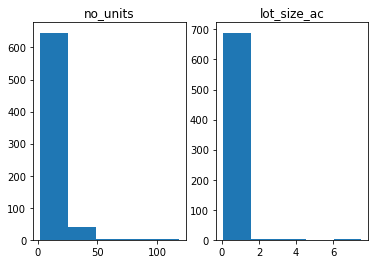

In [17]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['no_units'], bins=5)
axs[0].set_title('no_units')
axs[1].hist(df['lot_size_ac'], bins=5)
axs[1].set_title('lot_size_ac')

Text(0.5, 1.0, 'cap_rate')

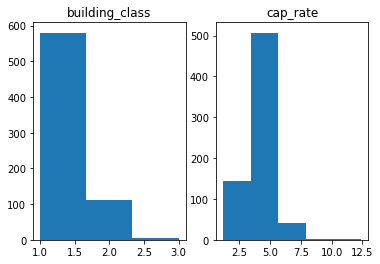

In [18]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['building_class'], bins=3)
axs[0].set_title('building_class')
axs[1].hist(df['cap_rate'], bins=5)
axs[1].set_title('cap_rate')

Text(0.5, 1.0, 'opportunity_zone')

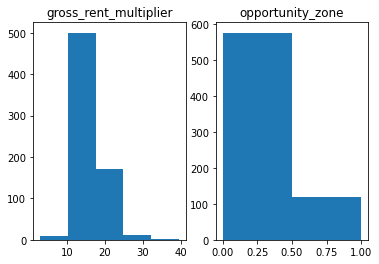

In [19]:
fig, axs = plt.subplots(1, 2)
axs[0].hist(df['gross_rent_multiplier'], bins=5)
axs[0].set_title('gross_rent_multiplier')
axs[1].hist(df['opportunity_zone'], bins=2)
axs[1].set_title('opportunity_zone')

# Correlation Analysis and Data Select

In [20]:
# correlation coefficient analysis
#X = df.iloc[:, 1:]
#y = df.iloc[:, -1]
result = df.corr()
result

,price_usd,size_sf,no_stories,house_age,parking_ratio,no_units,lot_size_ac,cap_rate,gross_rent_multiplier
price_usd,1.000000,0.938007,0.461811,-0.157687,-0.072847,0.779161,0.388533,-0.044139,-0.004010
size_sf,0.938007,1.000000,0.474117,-0.121416,-0.117587,0.858952,0.458972,-0.022681,-0.080365
no_stories,0.461811,0.474117,1.000000,-0.250841,-0.177621,0.386050,0.082444,0.019450,-0.039838
house_age,-0.157687,-0.121416,-0.250841,1.000000,-0.014926,-0.033128,-0.016926,-0.155513,0.068142
parking_ratio,-0.072847,-0.117587,-0.177621,-0.014926,1.000000,-0.072403,0.004417,0.088635,-0.087594
no_units,0.779161,0.858952,0.386050,-0.033128,-0.072403,1.000000,0.480966,0.055509,-0.176574
lot_size_ac,0.388533,0.458972,0.082444,-0.016926,0.004417,0.480966,1.000000,-0.036283,-0.052626
cap_rate,-0.044139,-0.022681,0.019450,-0.155513,0.088635,0.055509,-0.036283,1.000000,-0.794407
gross_rent_multiplier,-0.004010,-0.080365,-0.039838,0.068142,-0.087594,-0.176574,-0.052626,-0.794407,1.000000


According to the correlation coefficient, we can eliminate variables that are not closely related to the dependent variable 'price_usd', that is, the absolute value of the correlation coefficient is less than 0.1. Thus we drop 'parking_ratio','cap_rate'and 'gross_rent_multiplier'.

In [21]:
dff = df.drop(columns=['parking_ratio', 'cap_rate', 'gross_rent_multiplier'])

In [22]:
dff.head(5)

,price_usd,size_sf,sale_type,no_stories,house_age,no_units,lot_size_ac,building_class,opportunity_zone
0,3895000.0,8156.0,2,2.0,58.0,10.0,0.16,2,0
1,2925000.0,7000.0,2,2.0,9.0,7.0,0.28,1,0
2,4895000.0,10788.0,2,2.0,65.0,11.0,0.22,1,0
3,3799000.0,8812.0,2,3.0,1.0,7.0,0.19,2,1
4,2950000.0,7566.0,2,2.0,69.0,8.0,0.38,1,0


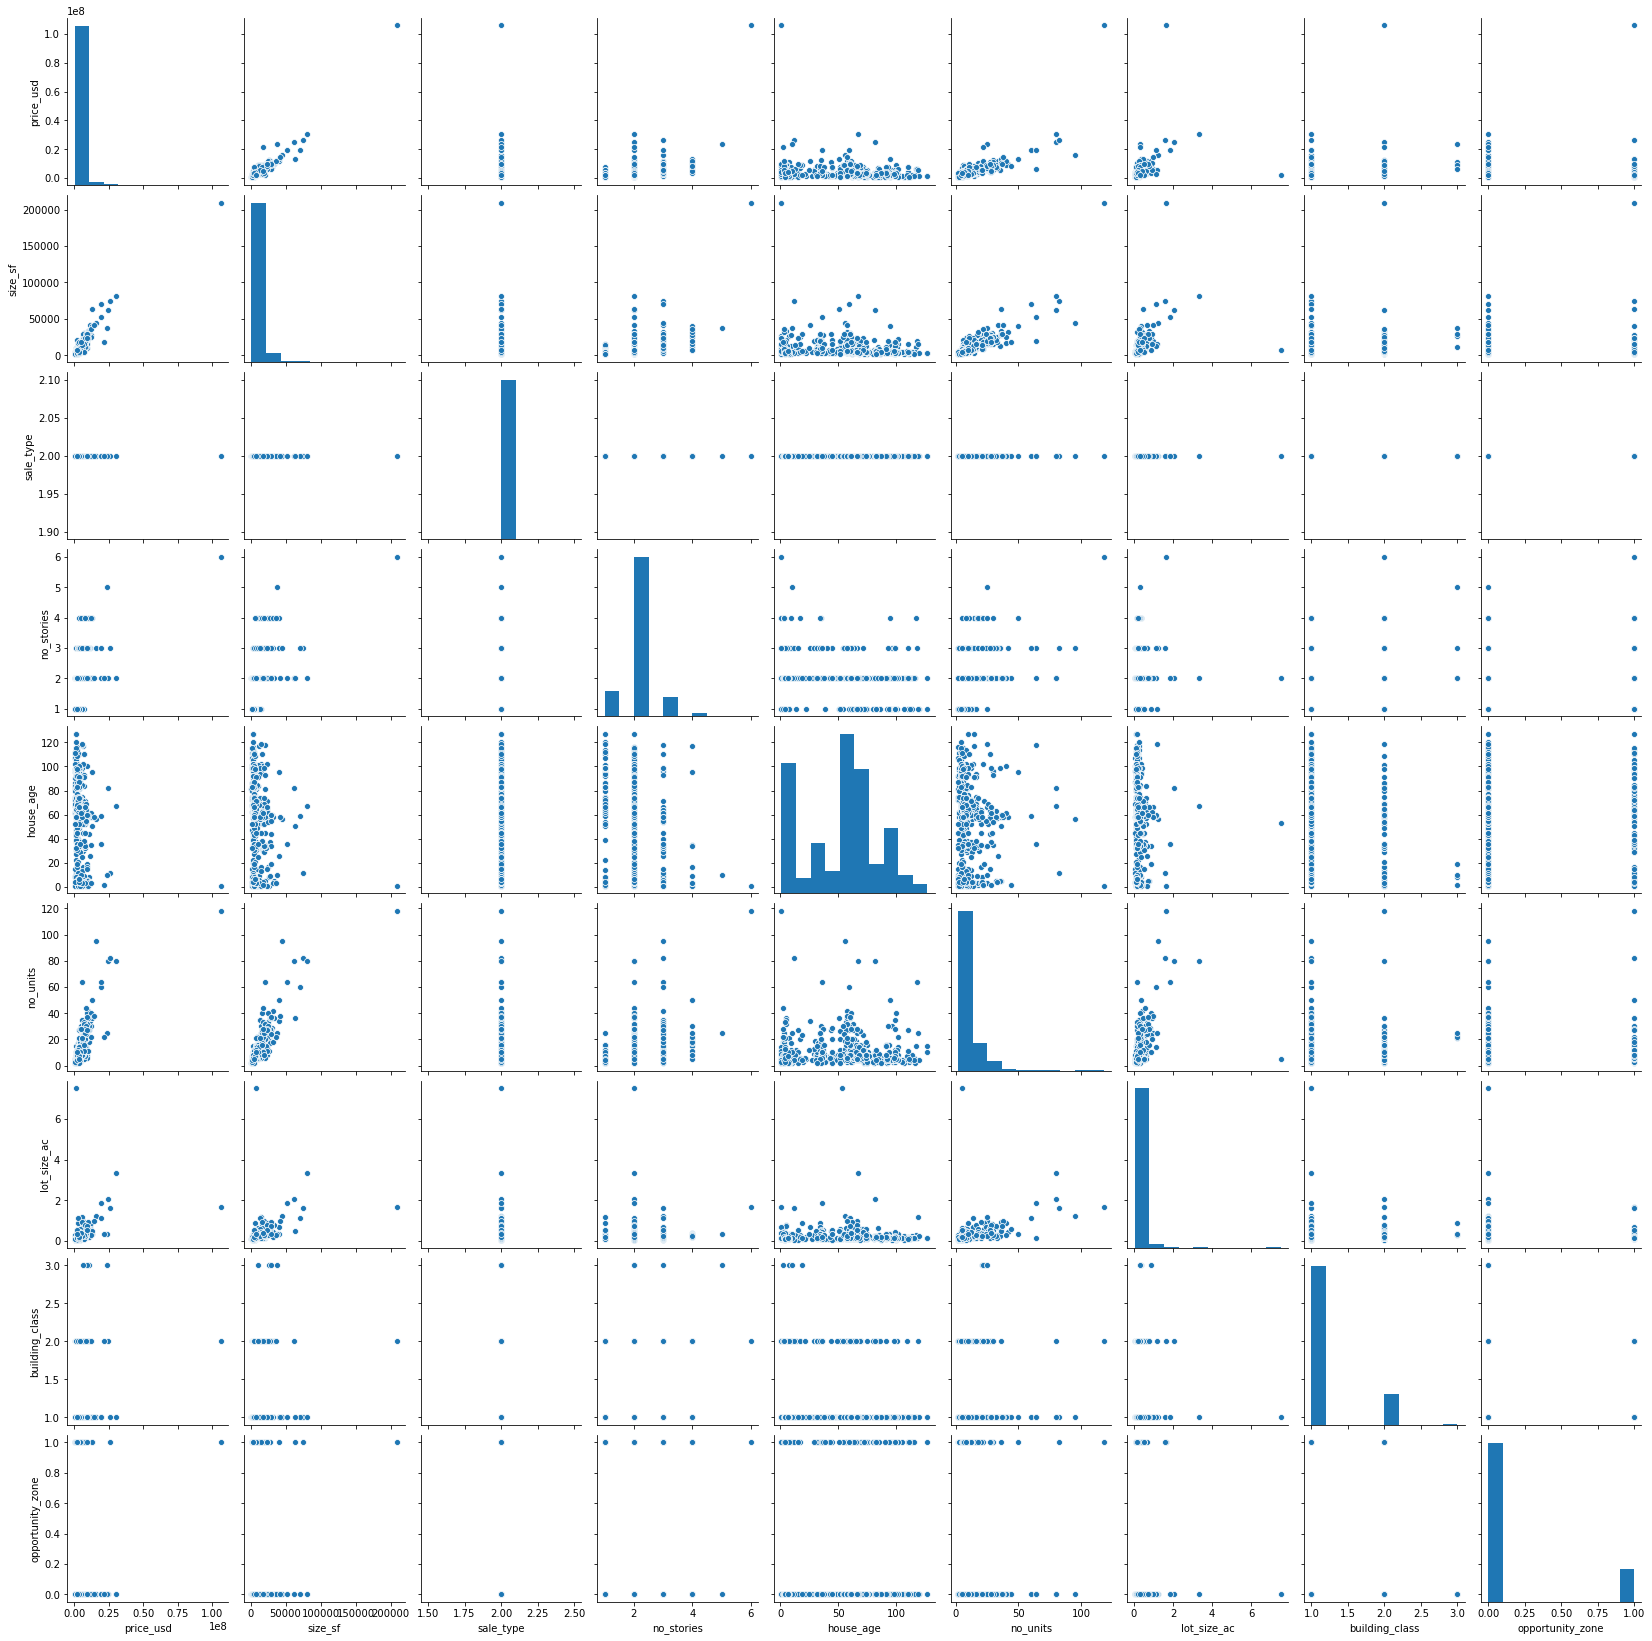

In [23]:
#seaborn pairs plots
sns.pairplot(dff)

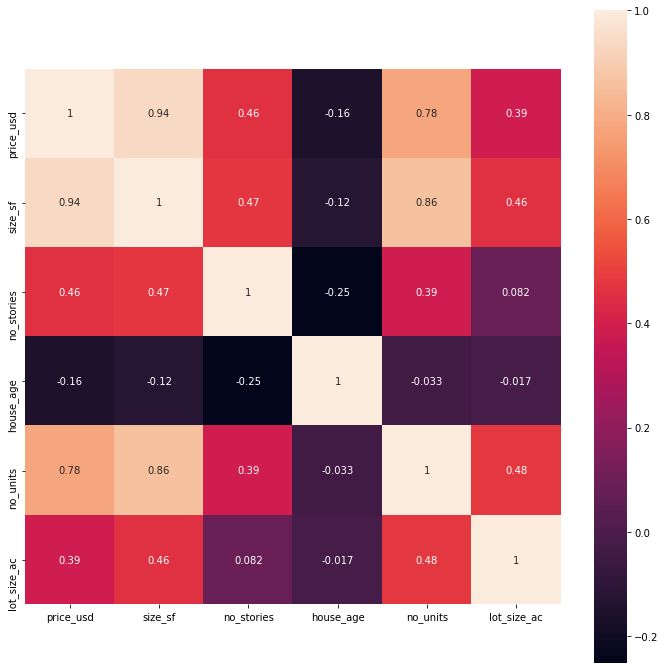

In [24]:
# heatmap
figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dff.corr(), square=True, annot=True, ax=ax)

From the pairs plots and the heat map between variables, we can clearly examine the correlation of variables. Classification variables are not suitable to investigate in correlation analysis, so they will be further analyzed according to significance in the following analysis.Due to the correlation plot, we drop 3 variables which are sale_type, building_class and opportunity_zone.

In [25]:
dff = dff.drop(columns=['sale_type', 'building_class' ,'opportunity_zone'])

In [26]:
X = dff.drop(["price_usd"], axis=1)
y = dff["price_usd"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

<Figure size 432x288 with 0 Axes>

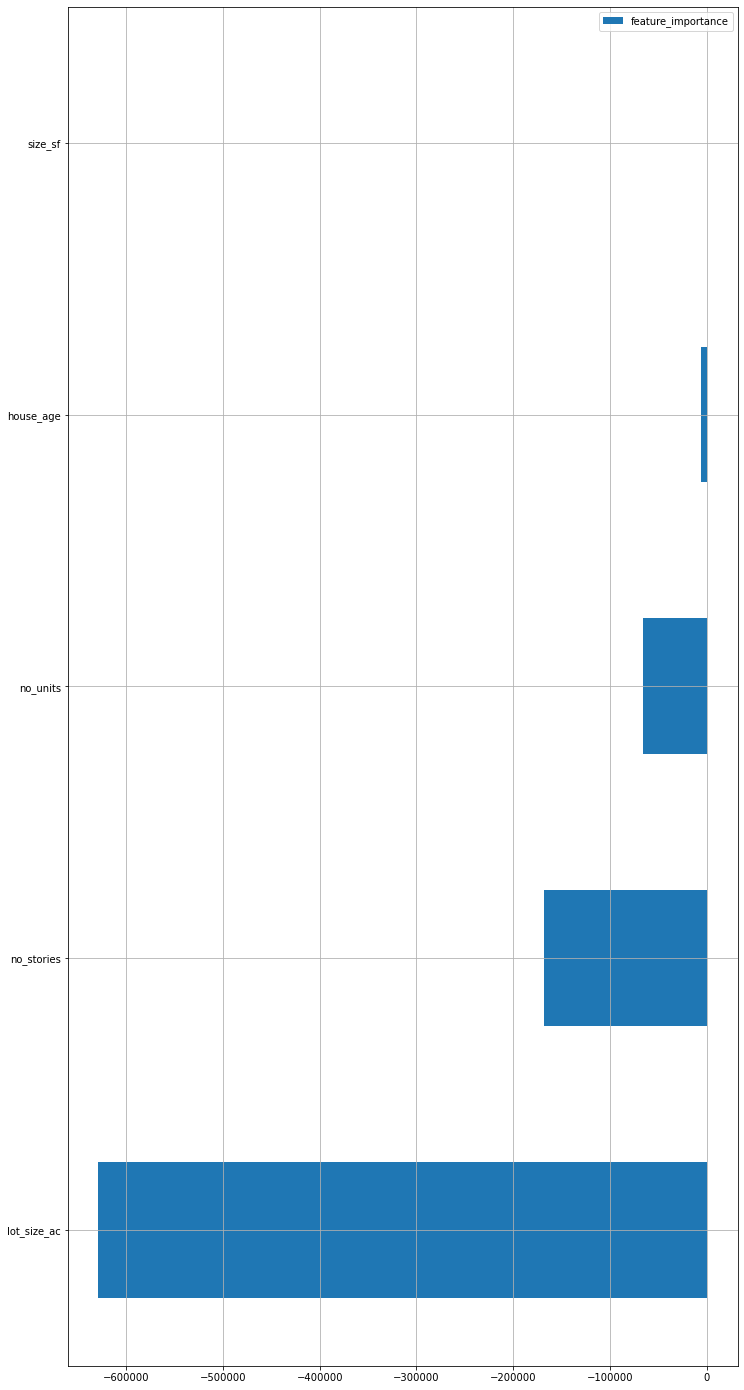

In [27]:
#show feature importance using lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso_fi = pd.DataFrame({'feature_importance':lasso.coef_}, index=X.columns)
lasso_fi.sort_values('feature_importance', ascending=False)
plt.figure()
lasso_fi[lasso_fi['feature_importance'] != 0].sort_values('feature_importance').plot(kind='barh', figsize=(12, 25))
plt.grid()
plt.show()

From the plot above the most important features to the price is number of stories, number of units, size, house age, and lot size. Built train set using these five features.

# Models Building

## Drop outliers

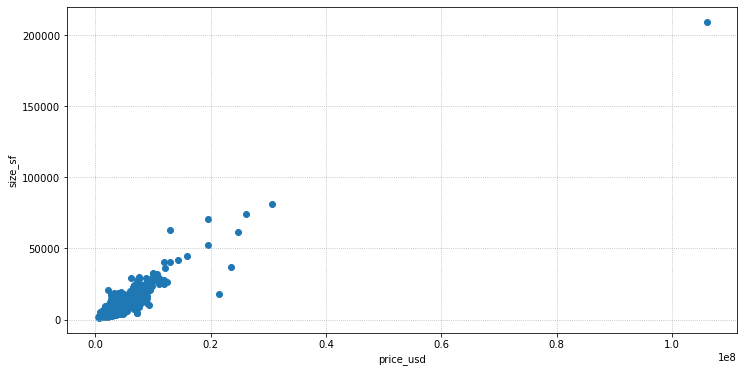

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(dff['price_usd'], dff['size_sf'])
plt.xlabel('price_usd')
plt.ylabel('size_sf')
plt.grid(b=True, ls=':')
plt.show()

In [29]:
dff.drop(dff[(dff.size_sf>50000)].index, inplace=True)

## Spilt data

In [31]:
X_try=dff[['no_stories','no_units','size_sf','house_age','lot_size_ac']]
y = dff["price_usd"]
X_train, X_test, y_train, y_test = train_test_split(X_try, y, train_size=0.8, random_state=1)

In [32]:
print("X_train.shape = " + str(X_train.shape))
print("X_test.shape = " + str(X_test.shape))
print("y_train.shape = " + str(y_train.shape))
print("y_test.shape = " + str(y_test.shape))

X_train.shape = (550, 5)
X_test.shape = (138, 5)
y_train.shape = (550,)
y_test.shape = (138,)


## Models Selection and Evaluation

In [33]:
#scale X set
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

In [34]:
def r_sq_calculate(y_predict,y):
  SSR=0
  SST=0
  for i in range(0,y.shape[0]):
    a=(y[i]-y_predict[i])**2
    b=(y[i]-np.mean(y))**2
    SSR=a+SSR
    SST=b+SST
    r_sq=1-SSR/SST
  return r_sq

### Linear Regression

In [35]:
lr_1=LinearRegression().fit(X_train_scale,y_train)
y_predict=lr_1.predict(X_test_scale)
print(r_sq_calculate(y_predict,y_test.values))
lr_2=LinearRegression().fit(X_train,y_train)
y_predict=lr_2.predict(X_test)
print(r_sq_calculate(y_predict,y_test.values))

0.780632380282645
0.8017252613051602


In [36]:
lasso_1=Lasso(alpha=0.0001,max_iter=1000).fit(X_train_scale,y_train)
y_predict=lasso_1.predict(X_test_scale)
print(r_sq_calculate(y_predict,y_test.values))
lasso_2=Lasso(alpha=0.0001,max_iter=1000).fit(X_train,y_train)
y_predict=lasso_2.predict(X_test)
print(r_sq_calculate(y_predict,y_test.values))
ridge_1=Ridge(alpha=0.0001).fit(X_train_scale,y_train)
y_predict=ridge_1.predict(X_test_scale)
print(r_sq_calculate(y_predict,y_test.values))
ridge_2=Ridge(alpha=0.0001).fit(X_train,y_train)
y_predict=ridge_2.predict(X_test)
print(r_sq_calculate(y_predict,y_test.values))
ENet= ElasticNetCV(cv=5)
ENet_1=ENet.fit(X_train_scale,y_train)
y_predict=ENet_1.predict(X_train_scale)
print(r_sq_calculate(y_predict,y_test.values))
ENet_2=ENet.fit(X_train,y_train)
y_predict=ENet_2.predict(X_train)
print(r_sq_calculate(y_predict,y_test.values))

0.780632380266082
0.801725261323002
0.7806323742980281
0.8017252716833669
-0.00848258224251719
-0.6061583923779659


### SVR

In [37]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_scale, y_train)
y_predict=regressor.predict(X_test_scale)
print(r_sq_calculate(y_predict,y_test.values))

-0.07603951977427625


### Random Forest

In [38]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_scale, y_train)
y_predict=regressor.predict(X_test_scale)
print(r_sq_calculate(y_predict,y_test.values))

0.7212300969385048


### Decision Tree

In [39]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train_scale,y_train)
tree_pred = reg_tree.predict(X_test_scale)
print(r_sq_calculate(tree_pred,y_test.values))

0.359693273078571


### KNN

In [40]:
reg_knn = KNeighborsRegressor(n_neighbors = 7)
# Implement the models on the training set
reg_knn.fit(X_train_scale,y_train)
knn_pred = reg_knn.predict(X_test_scale)
print(r_sq_calculate(knn_pred,y_test.values))

0.7834817178825151


# Choose 5 good deals

According to the r_square, we choose linear regression as our model. Next, we will use this model to predict the market value of the project ("y_pred") and compare the market value with the real value to choose 5 good deals.

In [41]:
y_pred=lr_2.predict(X_try)

In [42]:
diff = y-y_pred
diff_ratio = (diff/y) *100

In [43]:
dic = {'price_usd': y,'predicted price_usd': y_pred,'different':diff,'difference ratio':diff_ratio}
df = pd.DataFrame(dic)

In [44]:
df.sort_values(by = "difference ratio").head(5)

,price_usd,predicted price_usd,different,difference ratio
8148,410000.0,1.321017e+06,-9.110166e+05,-222.199164
4834,1095000.0,3.253640e+06,-2.158640e+06,-197.136098
417,2200000.0,6.227425e+06,-4.027425e+06,-183.064761
3188,675000.0,1.817584e+06,-1.142584e+06,-169.271762
747,2725000.0,5.867222e+06,-3.142222e+06,-115.310895
